In [1]:
 !cp -r ../input/custom-augment2/autoaugment.py ./

In [2]:
import numpy as np 
import pandas as pd 

import os

from keras.applications import ResNet50

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

#image preprocessing libraries
import skimage
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.transform import resize

import autoaugment

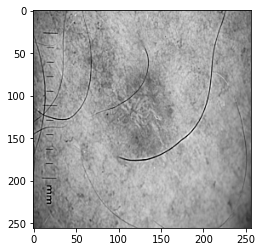

In [3]:
#path leading to training images
training_path = '../input/siim-isic-melanoma-classification/jpeg/train/' 
#generate a list of image names
training_image_names = [name for name in os.listdir(training_path)]

#testing the image loading and preporcessing
test_image = io.imread(training_path+training_image_names[1], as_gray=True)
test_image = resize(test_image, (256, 256))
test_image = unsharp_mask(test_image, radius=1, amount=3)
plt.imshow(test_image, cmap=plt.cm.gray)

In [4]:
## load training csv
training_labels = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv', sep=',')

#the train.csv holds more information than we need, thus we extract only the needed columns
training_labels = training_labels[['image_name', 'target']]

# the targets are: 0 = benign, 1 = malignant
#training labels that have a target of 0
training_labels_0 = pd.DataFrame(training_labels.loc[training_labels['target'] == 0])
#training labels that have a target of 1 
training_labels_1 = pd.DataFrame(training_labels.loc[training_labels['target'] == 1])
 
#in advance turn both pandas dataframes to numpy arrays, as we need to reshape their values later (a numpy function)
#and because the resnet model only accepts numpy arrays as inputs
training_labels_0 = np.asarray(training_labels_0)
training_labels_1 = np.asarray(training_labels_1)

#the structures of both numpy arrays are as follows:
#training_labels_# [index of the image][0 = name of the image, 1 = the target]

print("labels with a target of 0:",len(training_labels_0))
print("labels with a target of 1:",len(training_labels_1))

labels with a target of 0: 32542
labels with a target of 1: 584


In [11]:
def get_regular(path):
    
    image = io.imread(path, as_gray=True)
    image = resize(image, (256,256, 1))
    image = np.reshape(image, (256,256, 1))
    
    return image

In [6]:
from PIL import Image
def get_augmented(path, idx=5):
    
    policy = autoaugment.ImageNetPolicy(idx)

    image = Image.open(path)
    image = image.resize((256,256))
    image = image.convert('L')
    
    augmented = policy(image)
    augmented = np.array(augmented)
    augmented = np.reshape(augmented, (256,256,1))
    return augmented

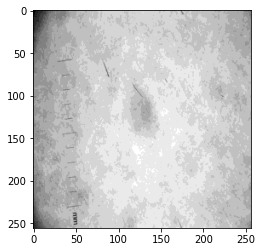

In [8]:

# image = io.imread(training_path+training_image_names[0])
# plt.imshow(image,cmap='gray')
image = get_augmented(training_path+training_image_names[0], 0)
plt.imshow(image, cmap='gray')

In [19]:
#Choose how many sample would you like
data_size = 584*2

#prepare numpy arrays, where the loaded images and labels will be stored
regular = np.zeros((data_size, 256, 256, 1))
augmented1 = np.zeros((data_size, 256, 256, 1))
augmented2 = np.zeros((data_size, 256, 256, 1))
augmented3 = np.zeros((data_size, 256, 256, 1))
augmented4 = np.zeros((data_size, 256, 256, 1))
augmented5 = np.zeros((data_size, 256, 256, 1))

labels = np.zeros((data_size))


In [20]:
for i in range(0, len(training_labels_1)):
    #load an image
    path = training_path+training_labels_1[i][0]+'.jpg'
    
    img = get_regular(path)
    regular[i] = img
    
    augmented = get_augmented(path, 0)
    augmented1[i] = augmented
    
    augmented = get_augmented(path, 1)
    augmented2[i] = augmented
    
    augmented = get_augmented(path, 2)
    augmented3[i] = augmented
    
    augmented = get_augmented(path, 3)
    augmented4[i] = augmented
    
    augmented = get_augmented(path, 4)
    augmented5[i] = augmented
    
    
    
    #storing the target label
    labels[i] = training_labels_1[i][1]
    
    if(i%200==0):
        #simple way of informing about the progress
        print(i, training_labels_1[i][0], "uploaded")
        
#same exact steps are applied to images, with a target of 0
for i in range(len(training_labels_1), data_size):
    
    path = training_path+training_labels_0[i][0]+'.jpg'
    
    img = get_regular(path)
    regular[i] = img
    
    augmented = get_augmented(path, 0)
    augmented1[i] = augmented
    
    augmented = get_augmented(path, 1)
    augmented2[i] = augmented
    
    augmented = get_augmented(path, 2)
    augmented3[i] = augmented
    
    augmented = get_augmented(path, 3)
    augmented4[i] = augmented
    
    augmented = get_augmented(path, 4)
    augmented5[i] = augmented
    
    
    #storing the image
    labels[i] = training_labels_0[i][1]
    if(i%200==0):
        print(i ,training_labels_0[i][0], "uploaded")
    

0 ISIC_0149568 uploaded
200 ISIC_3435596 uploaded
400 ISIC_7070020 uploaded
600 ISIC_0287804 uploaded
800 ISIC_0349484 uploaded
1000 ISIC_0412659 uploaded


In [21]:
# print(training_images.shape)
# print(training_labels.shape)
#split the data into training and testing

xtr0, xte0, ytr0, yte0 = train_test_split(regular, labels, train_size=0.8, random_state=42)


xtr1, xte1, ytr1, yte1 = train_test_split(augmented1, labels, train_size=0.8, random_state=42)
xtr2, xte2, ytr2, yte2 = train_test_split(augmented2, labels, train_size=0.8, random_state=42)
xtr3, xte3, ytr3, yte3 = train_test_split(augmented3, labels, train_size=0.8, random_state=42)
xtr4, xte4, ytr4, yte4 = train_test_split(augmented4, labels, train_size=0.8, random_state=42)
xtr5, xte5, ytr5, yte5 = train_test_split(augmented5, labels, train_size=0.8, random_state=42)
# xtr_segment, xte_segment, ytr_segment, yte_segment = train_test_split(training_segments, training_labels, train_size=0.8, random_state=42)


In [ ]:
plt.imshow(xtr1[8], cmap="gray")
print(xtr1[0])
# print(ytr_regular[1])

In [ ]:
yte_regular[np.where(yte_regular==0)].shape

In [ ]:
#The resnet model.
#For some reason the model states that the amount of classes in our database is 1 
#No weights, because imagenet is not useful for our purpose and i'm not aware of other weights we can use
#The input shape follows the shape of the images
#Sigmoid, because our classes range from 0 and 1 and it's recommended for binary categorization
model = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')

#Binary crossentropy because our classes range from 0 and 1
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])

In [34]:
def traintest(model, x_train, y_train, x_test, y_test, eps=50, batch=4):
    model.fit(x_train,y_train, batch_size=batch, epochs=eps, validation_split=0.1)
    evaluation = model.evaluate(x_test,y_test)
    return evaluation

In [35]:
model0 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model0, xtr0, ytr0, xte0, yte0))

Epoch 1/50
210/210 [==============================] - 17s 57ms/step - loss: 1.5749 - accuracy: 0.5842 - recall: 0.5726 - precision: 0.5799 - val_loss: 1.2853 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/50
210/210 [==============================] - 11s 52ms/step - loss: 0.7489 - accuracy: 0.6209 - recall: 0.5804 - precision: 0.6102 - val_loss: 1.5784 - val_accuracy: 0.5532 - val_recall: 0.9388 - val_precision: 0.5412
Epoch 3/50
210/210 [==============================] - 11s 52ms/step - loss: 0.7041 - accuracy: 0.6286 - recall: 0.6316 - precision: 0.6211 - val_loss: 0.6383 - val_accuracy: 0.5957 - val_recall: 0.4286 - val_precision: 0.6774
Epoch 4/50
210/210 [==============================] - 11s 52ms/step - loss: 0.6753 - accuracy: 0.6504 - recall: 0.6586 - precision: 0.6420 - val_loss: 2.5473 - val_accuracy: 0.6170 - val_recall: 0.2857 - val_precision: 0.9333
Epoch 5/50
210/210 [==============================] - 11s 52ms/step - loss: 0.6358 - acc

In [24]:
model0 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model0, xtr0, ytr0, xte0, yte0, batch_size=8))

model1 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model1, xtr1, ytr1, xte1, yte1, batch_size=8))

model2 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model2, xtr2, ytr2, xte2, yte2, batch_size=8))

model3 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model3, xtr3, ytr3, xte3, yte3, 20, batch_size=8))

model4 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model4, xtr4, ytr4, xte4, yte4, 20, batch_size=8))

model5 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model5, xtr5, ytr5, xte5, yte5, 20, batch_size=8))
#8

Epoch 1/50
105/105 [==============================] - 19s 94ms/step - loss: 1.6921 - accuracy: 0.5384 - recall: 0.5339 - precision: 0.5126 - val_loss: 0.8527 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/50
105/105 [==============================] - 8s 80ms/step - loss: 0.7281 - accuracy: 0.6351 - recall: 0.5821 - precision: 0.6488 - val_loss: 1.0286 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/50
105/105 [==============================] - 8s 79ms/step - loss: 0.6776 - accuracy: 0.6232 - recall: 0.6613 - precision: 0.6146 - val_loss: 0.9962 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/50
105/105 [==============================] - 8s 79ms/step - loss: 0.6936 - accuracy: 0.6452 - recall: 0.6138 - precision: 0.6493 - val_loss: 0.7313 - val_accuracy: 0.5213 - val_recall: 0.0816 - val_precision: 1.0000
Epoch 5/50
105/105 [==============================] - 8s 80ms/step - loss: 

In [27]:
model0 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model0, xtr0, ytr0, xte0, yte0, batch_size=4))

model1 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model1, xtr1, ytr1, xte1, yte1, batch_size=4))

model2 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model2, xtr2, ytr2, xte2, yte2, batch_size=4))

model3 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model3, xtr3, ytr3, xte3, yte3, 20, batch_size=4))

model4 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model4, xtr4, ytr4, xte4, yte4, 20, batch_size=4))

model5 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model5, xtr5, ytr5, xte5, yte5, 20, batch_size=4))
#4

Epoch 1/50
210/210 [==============================] - 19s 59ms/step - loss: 1.3148 - accuracy: 0.5724 - recall: 0.5639 - precision: 0.5746 - val_loss: 2.3015 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/50
210/210 [==============================] - 11s 53ms/step - loss: 0.7467 - accuracy: 0.6192 - recall: 0.4625 - precision: 0.6803 - val_loss: 0.9684 - val_accuracy: 0.5000 - val_recall: 0.0408 - val_precision: 1.0000
Epoch 3/50
210/210 [==============================] - 11s 54ms/step - loss: 0.6562 - accuracy: 0.6427 - recall: 0.5856 - precision: 0.6324 - val_loss: 0.7664 - val_accuracy: 0.5213 - val_recall: 1.0000 - val_precision: 0.5213
Epoch 4/50
210/210 [==============================] - 11s 53ms/step - loss: 0.6911 - accuracy: 0.6031 - recall: 0.6324 - precision: 0.6062 - val_loss: 4.2715 - val_accuracy: 0.6915 - val_recall: 0.4898 - val_precision: 0.8571
Epoch 5/50
210/210 [==============================] - 11s 53ms/step - loss: 0.6547 - acc

In [29]:
model0 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model0, xtr0, ytr0, xte0, yte0, batch_size=16))

model1 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model1, xtr1, ytr1, xte1, yte1, batch_size=16))

model2 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model2, xtr2, ytr2, xte2, yte2, batch_size=16))

model3 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model3, xtr3, ytr3, xte3, yte3, 20, batch_size=16))

model4 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model4, xtr4, ytr4, xte4, yte4, 20, batch_size=16))

model5 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model5, xtr5, ytr5, xte5, yte5, 20, batch_size=16))
#16

Epoch 1/50
53/53 [==============================] - 14s 149ms/step - loss: 1.7064 - accuracy: 0.5411 - recall: 0.5593 - precision: 0.5195 - val_loss: 0.8438 - val_accuracy: 0.4787 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/50
53/53 [==============================] - 7s 124ms/step - loss: 0.6543 - accuracy: 0.5917 - recall: 0.6142 - precision: 0.5846 - val_loss: 0.7473 - val_accuracy: 0.5213 - val_recall: 1.0000 - val_precision: 0.5213
Epoch 3/50
53/53 [==============================] - 7s 124ms/step - loss: 0.6721 - accuracy: 0.6201 - recall: 0.6110 - precision: 0.6000 - val_loss: 0.7363 - val_accuracy: 0.5213 - val_recall: 1.0000 - val_precision: 0.5213
Epoch 4/50
53/53 [==============================] - 7s 124ms/step - loss: 0.6447 - accuracy: 0.6513 - recall: 0.6629 - precision: 0.6420 - val_loss: 0.8767 - val_accuracy: 0.5213 - val_recall: 1.0000 - val_precision: 0.5213
Epoch 5/50
53/53 [==============================] - 7s 124ms/step - loss: 0.5972 - accuracy: 0.

In [31]:
model0 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model0, xtr0, ytr0, xte0, yte0, batch_size=2))

model1 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model1, xtr1, ytr1, xte1, yte1, batch_size=2))

model2 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model2, xtr2, ytr2, xte2, yte2, batch_size=2))

model3 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model3, xtr3, ytr3, xte3, yte3, 20, batch_size=2))

model4 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model4, xtr4, ytr4, xte4, yte4, 20, batch_size=2))

model5 = ResNet50(classes=1, weights=None, input_shape=(256,256,1), classifier_activation='sigmoid')
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])
print(traintest(model5, xtr5, ytr5, xte5, yte5, 20, batch_size=2))
#2

Epoch 1/50
420/420 [==============================] - 23s 43ms/step - loss: 1.1325 - accuracy: 0.5517 - recall: 0.5273 - precision: 0.5322 - val_loss: 0.7875 - val_accuracy: 0.5000 - val_recall: 0.0408 - val_precision: 1.0000
Epoch 2/50
420/420 [==============================] - 17s 40ms/step - loss: 0.7438 - accuracy: 0.6368 - recall: 0.4993 - precision: 0.6210 - val_loss: 0.7415 - val_accuracy: 0.6064 - val_recall: 0.9184 - val_precision: 0.5769
Epoch 3/50
420/420 [==============================] - 17s 40ms/step - loss: 0.7263 - accuracy: 0.6137 - recall: 0.5710 - precision: 0.6251 - val_loss: 7.4594 - val_accuracy: 0.5106 - val_recall: 0.2449 - val_precision: 0.5714
Epoch 4/50
420/420 [==============================] - 17s 40ms/step - loss: 0.7205 - accuracy: 0.5505 - recall: 0.5772 - precision: 0.5466 - val_loss: 1.2957 - val_accuracy: 0.5106 - val_recall: 0.5714 - val_precision: 0.5283
Epoch 5/50
420/420 [==============================] - 17s 40ms/step - loss: 0.7278 - accuracy: 0